In [1]:
from backtesting import Strategy
from backtesting.lib import crossover
from backtesting import Backtest
import pandas as pd
from backtesting.test import SMA
import pandas as pd
from bokeh.io import export_png
from backtesting.lib import SignalStrategy, TrailingStrategy
from backtesting import Position

/Users/fahad/anaconda3/lib/python3.7/site-packages/backtesting/_plotting.py:34: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `bokeh.io.reset_output()`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [2]:
FB_predictions = pd.read_csv("/Users/fahad/project_repo/models/final_models/Financial_Analysis/predictions/FB_predictions_RFC.csv", index_col=0)


In [3]:
FB_predictions.head()

Date  Predictions
0  2019-07-31            1
1  2019-06-28            0
2  2019-05-31            1
3  2019-04-30            1
4  2019-03-29            0

In [4]:
FB_predictions.Date = pd.to_datetime(FB_predictions.Date, format="%Y-%m-%d")

In [5]:
FB_predictions['Predictions'] = FB_predictions['Predictions'].shift(-1)


In [6]:
FB_predictions = FB_predictions.dropna()


In [7]:
FB_predictions = FB_predictions[::-1]

In [8]:
FB_predictions.head(10)

Date  Predictions
83 2012-08-31          0.0
82 2012-09-28          1.0
81 2012-10-31          1.0
80 2012-11-30          1.0
79 2012-12-31          1.0
78 2013-01-31          0.0
77 2013-02-28          0.0
76 2013-03-28          0.0
75 2013-04-30          1.0
74 2013-05-31          0.0

In [9]:
FB_monthly = pd.read_csv("/Users/fahad/project_repo/data/final/FB/FB_monthly.csv", index_col =0)

In [10]:
FB_monthly.columns = ['Open','High','Low','Close','Volume']

In [11]:
FB_predictions = FB_predictions.set_index("Date")

In [12]:
FB_monthly.tail()

Open   High    Low   Close      Volume
2012-10-31  22.080  24.25  18.80  21.110  1100938300
2012-09-28  18.080  23.37  17.55  21.660  1058643700
2012-08-31  21.500  22.45  18.03  18.058  1151944900
2012-07-31  31.250  32.88  21.61  21.710   520189700
2012-06-29  28.892  33.45  25.52  31.095   667910500

In [13]:
FB_final_df = pd.merge(FB_predictions, FB_monthly, right_index=True, left_index=True)

In [14]:
FB_final_df.index = pd.to_datetime(FB_final_df.index, format ="%Y-%m-%d")

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

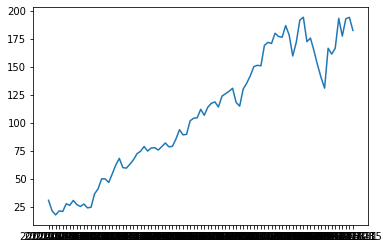

In [16]:
plt.plot(FB_monthly.index[::-1], FB_monthly.Close[::-1])

In [17]:
equity_dict = dict()

In [18]:
class Binary_Classification_1d(TrailingStrategy):

    
    def init(self):
        
        super().init()
        self.data.Predictions
        
    def next(self):
        super().init()
        equity_dict[self.data.index[-1]] = TrailingStrategy.equity.__get__(self)
        
        position = Strategy.position.__get__(self)
        
        if self.data.Predictions[-1] == 1.0 and (position.is_long != True) :
#             print("\n")
#             print (self.data.Prediction[-1])
            
            self.buy()

        # Else, if sma1 crosses below sma2, sell it
        elif self.data.Predictions[-1] == 0.0 and (position.is_short != True) :
#             print("\n")
#             print (self.data.Prediction[-1])
            
            self.sell()
            
 

In [19]:
bt = Backtest(FB_final_df, Binary_Classification_1d, cash=10000, commission=.01)
bt.run()



Start                          2012-08-31 00:00:00
End                            2019-07-31 00:00:00
Duration                        2525 days 00:00:00
Exposure [%]                               96.2772
Equity Final [$]                            362728
Equity Peak [$]                             362728
Return [%]                                 3527.28
Buy & Hold Return [%]                       975.59
Max. Drawdown [%]                         -21.9398
Avg. Drawdown [%]                         -4.98377
Max. Drawdown Duration           305 days 00:00:00
Avg. Drawdown Duration            90 days 00:00:00
# Trades                                        34
Win Rate [%]                               76.4706
Best Trade [%]                             69.6503
Worst Trade [%]                           -15.8678
Avg. Trade [%]                             10.9683
Max. Trade Duration              332 days 00:00:00
Avg. Trade Duration               72 days 00:00:00
Expectancy [%]                 

In [20]:
bt.plot(superimpose=False, plot_volume=False)

In [21]:
df = pd.DataFrame.from_dict([equity_dict])

In [22]:
df = df.T

In [23]:
df.columns = ['Equity']

In [24]:
export = df.to_csv("/Users/fahad/project_repo/data/final/Equity/RFC/FB_RFC_Equity.csv")

In [25]:
df

Equity
2012-09-28   10000.000000
2012-10-31    9466.028125
2012-11-30   12555.603386
2012-12-31   11936.791505
2013-01-31   13892.326733
2013-02-28   15436.998930
2013-03-28   16178.436612
2013-04-30   15206.576082
2013-05-31   13131.667630
2013-06-28   12628.924305
2013-07-31   18359.220163
2013-08-30   20601.240147
2013-09-30   25059.337739
2013-10-31   25046.865443
2013-11-29   27014.252871
2013-12-31   31228.677938
2014-01-31   35755.061915
2014-02-28   39120.849268
2014-03-31   41686.902145
2014-04-30   41947.162392
2014-05-30   43122.903546
2014-06-30   45841.077087
2014-07-31   49492.558336
2014-08-29   46958.793501
2014-09-30   48858.088160
2014-10-31   50534.787992
2014-11-28   48876.204058
2014-12-31   49137.558868
2015-01-30   50665.184327
2015-02-27   48757.055539
...                   ...
2017-02-28   96464.638278
2017-03-31  101097.844676
2017-04-28  106933.834302
2017-05-31  107794.998625
2017-06-30  107453.379720
2017-07-31  120456.249288
2017-08-31  122392.089749
2017-09-29  121609.213092
2017-10-31  128149.791710
2017-11-30  126100.078280
2017-12-29  123738.200711
2018-01-31  127968.212336
2018-02-28  134314.526245
2018-03-29  146876.852973
2018-04-30  159947.322093
2018-05-31  178341.264134
2018-06-29  180703.276914
2018-07-31  197181.202507
2018-08-31  194280.937341
2018-09-28  204657.441601
2018-10-31  216322.952601
2018-11-30  226616.592142
2018-12-31  203688.313190
2019-01-31  259003.775465
2019-02-28  250861.836636
2019-03-29  259003.775465
2019-04-30  300505.910222
2019-05-31  326283.691006
2019-06-28  360430.738312
2019-07-31  362727.783950

[83 rows x 1 columns]